<a href="https://colab.research.google.com/github/ReaganTiburan/Stock-Market-Prediction/blob/main/07_Project_2_Part_2_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load the Data

In [2]:
filename1 = '/content/drive/MyDrive/Coding Dojo Project/Coding Dojo/07 Week 7: Classification/03 Attachments/HistoricalPrices.csv'
df = pd.read_csv(filename1)
filename2 = '/content/drive/MyDrive/Coding Dojo Project/Coding Dojo/07 Week 7: Classification/03 Attachments/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
df2 = pd.read_csv(filename2)


## First choice: dataset 1

In [3]:
# show first 5 rows
df.head()

,Date,Open,High,Low,Close,Volume
0,03/31/22,35.70,35.80,35.05,35.05,16600801.0
1,03/30/22,35.20,36.00,35.20,35.60,8648500.0
2,03/29/22,35.50,35.60,35.10,35.25,10492000.0
3,03/28/22,36.00,36.05,35.65,36.00,5011300.0
4,03/25/22,35.85,36.10,35.60,36.00,8273400.0


## Second choice: dataset 2

In [4]:
# show first 5 rows
df2.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


## Data Cleaning

In [5]:
# First 5 rows of our DataFrame
df.head()

,Date,Open,High,Low,Close,Volume
0,03/31/22,35.70,35.80,35.05,35.05,16600801.0
1,03/30/22,35.20,36.00,35.20,35.60,8648500.0
2,03/29/22,35.50,35.60,35.10,35.25,10492000.0
3,03/28/22,36.00,36.05,35.65,36.00,5011300.0
4,03/25/22,35.85,36.10,35.60,36.00,8273400.0


In [6]:
# reverse Date order
df = df.iloc[::-1]
df.head()

,Date,Open,High,Low,Close,Volume
6577,06/27/94,6.914,6.914,6.790,6.914,6.326100e+05
6576,06/28/94,6.914,7.037,6.790,6.914,3.257010e+06
6575,01/03/95,9.383,9.630,9.383,9.383,2.528820e+06
6574,01/04/95,9.136,9.383,9.012,9.136,6.406695e+06
6573,01/05/95,8.889,9.136,8.765,8.889,6.325695e+06


In [7]:
# DataFrame Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6578 entries, 6577 to 0
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     6578 non-null   object 
 1    Open    6578 non-null   float64
 2    High    6578 non-null   float64
 3    Low     6578 non-null   float64
 4    Close   6578 non-null   float64
 5    Volume  6578 non-null   float64
dtypes: float64(5), object(1)
memory usage: 308.5+ KB


In [8]:
# # change Date dtype
df['Date'] = pd.to_datetime(df.Date)

In [9]:
# set Date as the index
df.set_index('Date', inplace = True)

In [10]:
# Display first 5 rows
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1994-06-27,6.914,6.914,6.790,6.914,6.326100e+05
1994-06-28,6.914,7.037,6.790,6.914,3.257010e+06
1995-01-03,9.383,9.630,9.383,9.383,2.528820e+06
1995-01-04,9.136,9.383,9.012,9.136,6.406695e+06
1995-01-05,8.889,9.136,8.765,8.889,6.325695e+06


In [24]:
# Duplicates
df.duplicated().sum()

1

In [26]:
# Drop Duplicates
df.drop_duplicates(inplace = True)

In [12]:
# Missing Values
df.isnull().sum()

 Open      0
 High      0
 Low       0
 Close     0
 Volume    0
dtype: int64

In [13]:
# create a function
def display(dtype):
    for column in df:
     if df[column].dtype == dtype:
            print(df[column].unique())

# create a DataFrame 
df1 = pd.DataFrame(df.dtypes)
# rename a column
df1 = df1.rename(columns = {0: 'dt'})
# create a variable
g = df1['dt'].value_counts(ascending = True)

# create a list
dtype = g.index
# iterate and call a function (dtype)
for i in dtype:
    x = display(i)
    print(x)

[ 6.914  9.383  9.136 ... 34.35  32.55  35.35 ]
[ 6.914  7.037  9.63  ... 30.15  36.65  35.35 ]
[ 6.79   9.383  9.012 ... 32.3   40.65  36.35 ]
[ 6.914  9.383  9.136 ... 37.35  35.45  36.75 ]
[  632610.00803415  3257010.04136403  2528820.03211602 ...
 10492000.          8648500.         16600801.        ]
None


In [14]:
# Descriptive Statistics of our DataFrame
df.describe()

,Open,High,Low,Close,Volume
count,6578.000000,6578.000000,6578.000000,6578.000000,6.578000e+03
mean,19.033955,19.272029,18.779589,19.035481,1.061141e+07
std,13.888124,14.035508,13.727141,13.894332,9.250954e+06
min,3.042000,3.125000,2.958000,3.042000,1.200000e+04
25%,7.000000,7.118000,6.914750,7.000000,5.105243e+06
50%,13.521000,13.750000,13.426000,13.500000,8.567700e+06
75%,33.000000,33.400000,32.550000,33.000000,1.347720e+07
max,53.500000,53.850000,52.800000,53.500000,1.880600e+08


In [15]:
# create a correlation
corr = df.corr()

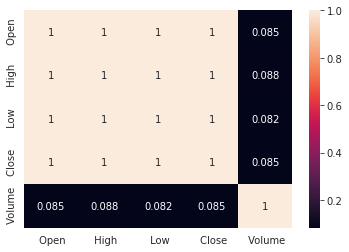

In [16]:
# Plot correlation using Heatmap
sns.set_style('whitegrid')
sns.heatmap(corr, annot = True);

Feature Open, High, Low are strongly Correlated with our Feature Close

In [17]:
# check column names for whitspace
df.columns

Index([' Open', ' High', ' Low', ' Close', ' Volume'], dtype='object')

In [18]:
# remove whitespace in the column names
df.columns = df.columns.str.replace(' ', '')

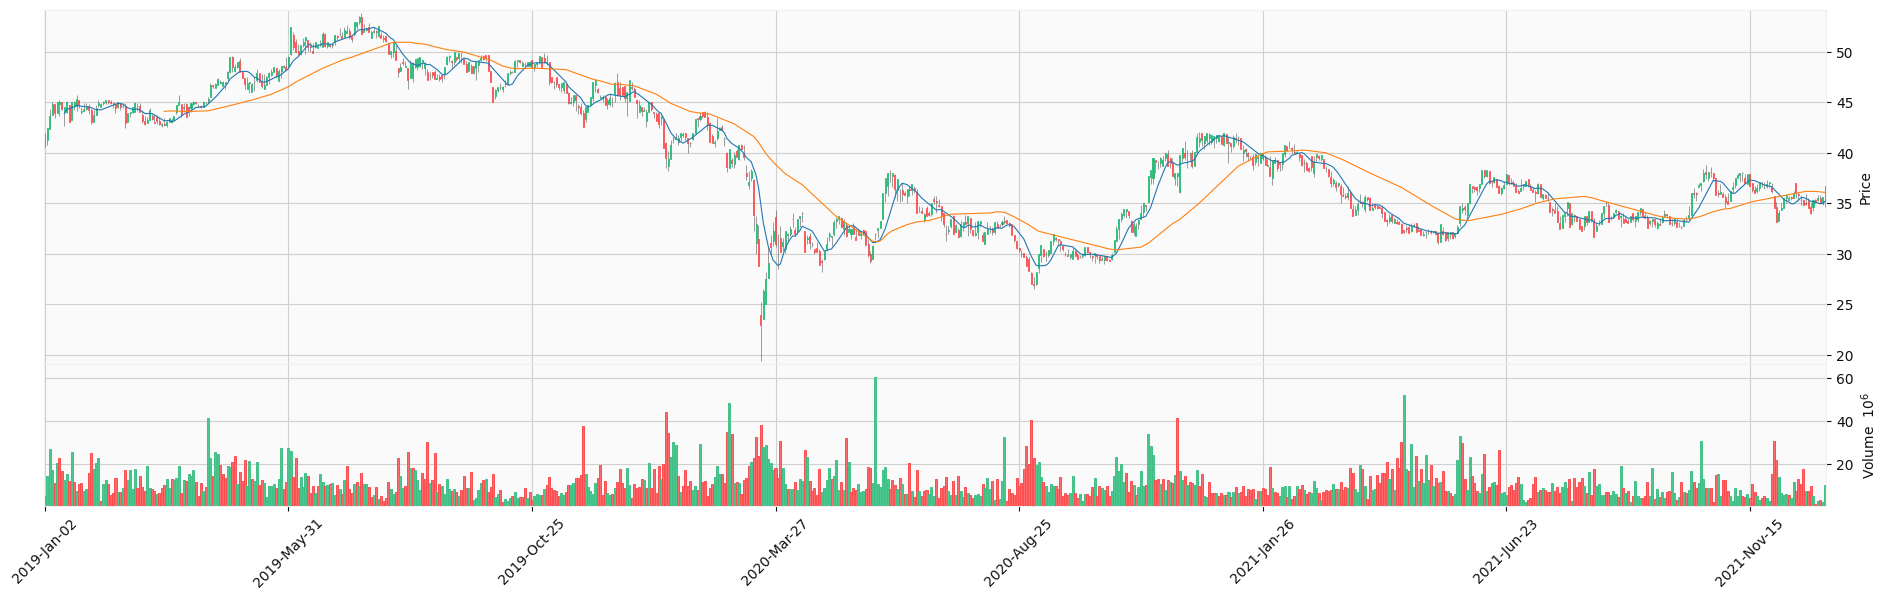

In [19]:
# mpf.plot(df['2018-01':'2022-03'],figratio = (50, 20), type = 'candle')
# plt.tight_layout()
import warnings
warnings.filterwarnings('ignore')
mpf.plot(df['2019':'2021'], type='candle', volume=True, 
         mav=(9,50),style = 'yahoo', figratio = (50,14),
         tight_layout = True)



In [20]:
# avialable styles
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

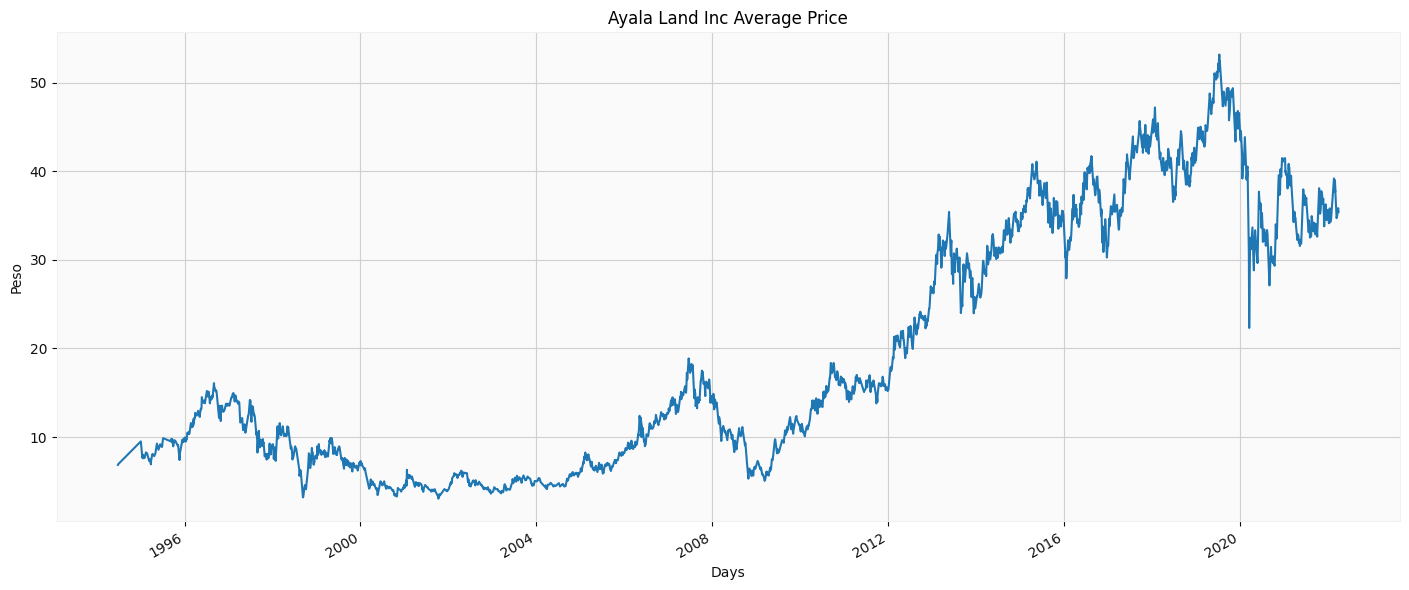

In [21]:
# Plot Historical Prive by average
df["Average_Price"] = (df["Low"] + df["High"])/2 
df.Average_Price.plot(title = 'Ayala Land Inc Average Price', figsize=(14,6))
plt.tight_layout()
plt.xlabel('Days')
plt.ylabel('Peso')
plt.show()